In [3]:
# -------------------- Part 1: Preliminary Process for the SemArt Dataset --------------------
import pandas as pd
import re
import os

In [5]:
#################### Step 1.1: Construct the initial SemArt dataset and view the data structure ####################
# Load the SemArt datasets
train = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemArt/semart_train.csv", sep = "\t", encoding = "ISO-8859-1")
val = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemArt/semart_val.csv", sep = "\t", encoding = "ISO-8859-1")
test = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemArt/semart_test.csv", sep = "\t", encoding = "ISO-8859-1")

# Combine the loaded datasets
all = pd.concat([train, val, test], ignore_index = True)

# Save the combined dataset
all.to_csv("/Users/cyq/Desktop/Dissertation/Database/SemArt/semart_all.csv")

# View the data structure
all.info() # View the summary information
display(all.head()) # First 5 lines
print(all.duplicated().sum()) # Show the number of duplicated rows
print(all.isnull().sum()) # Show the number of missing data

# Number of unique artworks
all_unique_artworks = all[["AUTHOR", "TITLE"]].drop_duplicates()
print("Number of artworks:", len(all_unique_artworks))

# View the duplicated artist with same artworks
dup_artworks = all[["AUTHOR", "TITLE"]].duplicated(keep = False)
repeated = all[dup_artworks].sort_values(by = ["AUTHOR", "TITLE"])
display(repeated)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21382 entries, 0 to 21381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IMAGE_FILE   21382 non-null  object
 1   DESCRIPTION  21382 non-null  object
 2   AUTHOR       21382 non-null  object
 3   TITLE        21382 non-null  object
 4   TECHNIQUE    21382 non-null  object
 5   DATE         21382 non-null  object
 6   TYPE         21382 non-null  object
 7   SCHOOL       21382 non-null  object
 8   TIMEFRAME    21382 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


,IMAGE_FILE,DESCRIPTION,AUTHOR,TITLE,TECHNIQUE,DATE,TYPE,SCHOOL,TIMEFRAME
0,19873-1darmst.jpg,"The Meyer or Darmstadt Madonna is the last, mo...","HOLBEIN, Hans the Younger",Darmstadt Madonna,"Oil on limewood, 147 x 102 cm",1526 and after 1528,religious,German,1501-1550
1,18759-guard301.jpg,Whereas Canaletto incorporates classically ins...,"GUARDI, Francesco",Landscape with a Fisherman's Tent,"Oil on canvas, 49 x 77 cm",1770-75,landscape,Italian,1751-1800
2,04589-temptati.jpg,In this painting the refinement of the colouri...,"BILIVERT, Giovanni",The Temptation of Charles and Ubalde,"Oil on copper, 37 x 28 cm",1629-30,religious,Italian,1601-1650
3,15104-magi.jpg,"The left side of the painting was cut, origina...",GEERTGEN tot Sint Jans,Adoration of the Magi,"Panel, 111 x 69 cm",1480-85,religious,Netherlandish,1451-1500
4,36582-paolo_f1.jpg,The painting illustrates a famous episode from...,"SCHEFFER, Ary",The Ghosts of Paolo and Francesca Appear to Da...,"Oil on canvas, 167 x 234 cm",1835,other,Dutch,1801-1850


0
IMAGE_FILE     0
DESCRIPTION    0
AUTHOR         0
TITLE          0
TECHNIQUE      0
DATE           0
TYPE           0
SCHOOL         0
TIMEFRAME      0
dtype: int64
Number of artworks: 19571


,IMAGE_FILE,DESCRIPTION,AUTHOR,TITLE,TECHNIQUE,DATE,TYPE,SCHOOL,TIMEFRAME
3809,00072-lucca3.jpg,Ademollo decorated the walls of the Sala degli...,"ADEMOLLO, Luigi",Episodes in Roman History,Fresco,1820s,historical,Italian,1801-1850
18588,00070-lucca1.jpg,Ademollo decorated the walls of the Sala degli...,"ADEMOLLO, Luigi",Episodes in Roman History,Fresco,1820s,historical,Italian,1801-1850
19185,00071-lucca2.jpg,Ademollo decorated the walls of the Sala degli...,"ADEMOLLO, Luigi",Episodes in Roman History,Fresco,1820s,historical,Italian,1801-1850
7110,00065-ark.jpg,"Luigi Ademollo, an Italian painter, draftsman,...","ADEMOLLO, Luigi",View of the Room of the Ark,Fresco,1816,religious,Italian,1801-1850
12564,00066-ark1.jpg,"Luigi Ademollo, an Italian painter, draftsman,...","ADEMOLLO, Luigi",View of the Room of the Ark,Fresco,1816,interior,Italian,1801-1850
...,...,...,...,...,...,...,...,...,...
6774,44728-farnese8.jpg,The themes painted in the ground floor apartme...,"ZUCCARO, Taddeo",View of the ceiling,Fresco,1562-63,historical,Italian,1551-1600
9636,44726-farnese6.jpg,In the two rooms on the piano nobile suited fo...,"ZUCCARO, Taddeo",View of the ceiling,Fresco,1562-63,historical,Italian,1551-1600
13326,44729-farnese9.jpg,Connecting to the Sala del Concilio is the pri...,"ZUCCARO, Taddeo",View of the ceiling,Fresco,1562-63,historical,Italian,1551-1600
13082,44779-crucifix.jpg,"This monumental picture, signed and dated at t...","ZURBARÁN, Francisco de",Christ on the Cross,"Oil on canvas, 212 x 163 cm",1655,religious,Spanish,1601-1650


In [7]:
#################### Step 1.2: Check If All the Image-text Pairs Can be Successfully Matched ####################
# Load the dataset and image folders
all = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemArt/semart_all.csv")
image_folder = "/Users/cyq/Desktop/Dissertation/Database/SemArt/images"

# Clean the format of the IMAGE_FILE
all["IMAGE_FILE"] = all["IMAGE_FILE"].astype(str).str.strip()

# Construct the full path for each image file
all["full_path"] = all["IMAGE_FILE"].apply(lambda x: os.path.join(image_folder, x))

# Check and print the first 5 lines of image paths
print(all["full_path"].head())
print([os.path.exists(p) for p in all["full_path"].head()]) # Check if they exist in the local folder

# Find all image-text pairs in the both image files and SemArt dataset
valid_match = all[all["full_path"].apply(os.path.exists)]

# Print the number of successfully matching image-text pairs
print(f"Number of successful matching：{len(valid_match)}")

0    /Users/cyq/Desktop/Dissertation/Database/SemAr...
1    /Users/cyq/Desktop/Dissertation/Database/SemAr...
2    /Users/cyq/Desktop/Dissertation/Database/SemAr...
3    /Users/cyq/Desktop/Dissertation/Database/SemAr...
4    /Users/cyq/Desktop/Dissertation/Database/SemAr...
Name: full_path, dtype: object
[True, True, True, True, True]
Number of successful matching：21382


In [13]:
#################### Step 1.3: Standardise the Text Format and Remove Duplicate Artworks ####################
# Define a function to standardise the text format
def normalize(text):
    if pd.isna(text): return ""
    return re.sub(r"[^\w\s]", "", str(text).lower()).replace(" ", "").strip()

# Define a function to standardise the author format
def normalize_author(author):
    if pd.isna(author): return ""
    author = author.strip().lower()
    if "," in author:
        parts = [part.strip() for part in author.split(",")]
        author = parts[1] + " " + parts[0] if len(parts) > 1 else parts[0]
    author = re.sub(r"[^a-z\s]", "", author)
    return re.sub(r"\s+", " ", author).strip()

# Add new standadised columns in the SemArt dataset
all["norm_title"] = all["TITLE"].apply(normalize)
all["norm_author"] = all["AUTHOR"].apply(normalize_author)

# Find out the duplicated records
duplicates_1 = all.duplicated(subset=["norm_author", "norm_title"], keep = "first")
removed_duplicates = all[duplicates_1]

# Save the removed records and print the number of records
removed_duplicates.to_csv("/Users/cyq/Desktop/Dissertation/Database/semart_removed_duplicates.csv", index = False)
print(f"Number of removed artworks：{len(removed_duplicates)}")

# Count the number of unique paintings
unique_paintings = all[["norm_author", "norm_title"]].drop_duplicates()
print("Number of unique paintings after standardised:", len(unique_paintings))

# Remove duplicated artworks and keep only one record for each unique painting
semart = all.drop_duplicates(subset = ["norm_author", "norm_title"])
print("Number of records of cleaned dataset", len(semart))

# Number of artists
num_authors_before = all["norm_author"].nunique()
num_authors_after = semart["norm_author"].nunique()
print("Number of unique authors before cleaning:", num_authors_before)
print("Number of unique authors after cleaning:", num_authors_after)

# Save the cleaned dataset
semart.to_csv("/Users/cyq/Desktop/Dissertation/Database/SemiCorpus_deduplicated.csv", index = False)

Number of removed artworks：1823
Number of unique paintings after standardised: 19559
Number of records of cleaned dataset 19559
Number of unique authors before cleaning: 3270
Number of unique authors after cleaning: 3270


In [4]:
# -------------------- Part 2: Constructing Fuzzy Description Corpus Based on ArtEmis Dataset --------------------
import pandas as pd
import re
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import os
import hashlib
import imagehash
from PIL import Image

In [6]:
########## Step 2.1: Import the original ArtEmis datasets and check for the data structure ##########
# Load the original ArtEmis dataset
fuzdata1 = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/ArtEmis/ola_dataset_release_v0.csv")
fuzdata2 = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/ArtEmis/artemis_dataset_release_v0.csv")

# View the data structure of fuzdata1
print("Structure of fuzzy dataset 1: \n")
display(fuzdata1.head()) # First 5 lines
print("Duplicated rows of fuzdata1:", fuzdata1.duplicated().sum()) # Show the number of duplicated rows
print("Missing values of fuzdata1: \n", fuzdata1.isnull().sum()) # Show the number of missing data

# View the data structure of fuzdata2
print("Structure of fuzzy dataset 2: \n")
display(fuzdata2.head()) # First 5 lines
print("Duplicated rows of fuzdata1:", fuzdata2.duplicated().sum()) # Show the number of duplicated rows
print("Missing values of fuzdata1: \n", fuzdata2.isnull().sum()) # Show the number of missing data

Structure of fuzzy dataset 1: 



,art_style,painting,utterance
0,Realism,ivan-shishkin_pine-forest-1884,A forest is growing by some water but trees ar...
1,Ukiyo_e,utagawa-kuniyoshi_oniwakamaru-preparing-to-kil...,People from a Japanese village are trying to c...
2,Expressionism,max-pechstein_untitled-1920,A drawing with a few sailboats on the rippled ...
3,Baroque,canaletto_campo-santi-apostoli,A cityscape with buildings overlooking a spars...
4,Rococo,bernardo-bellotto_mniszech-palace-in-warsaw-1779,A busy city street filled with people riding h...


Duplicated rows of fuzdata1: 0
Missing values of fuzdata1: 
 art_style    0
painting     0
utterance    0
dtype: int64
Structure of fuzzy dataset 2: 



,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10


Duplicated rows of fuzdata1: 16
Missing values of fuzdata1: 
 art_style     0
painting      0
emotion       0
utterance     0
repetition    0
dtype: int64


In [8]:
########## Step 2.2: Separate "painting" into "artist", "artwork", "year" ##########
# Define the painting-spliting function to split the "painting" into artist, artwork and year
def split_painting(painting):
    # Try to match if the string contains '-year' at the end
    match = re.match(r"(.+)-(\d{4})$", painting)
    # If the string contains year
    if match:
        artist_artwork = match.group(1) # Extract the content of artist and artwork before year
        year = match.group(2) # Extract year
    # If the string does not contain year
    else:
        artist_artwork = painting # Take the whole string as artist and artwork
        year = None
    # Use underscore to split "artist" and "artwork"
    parts = artist_artwork.split("_", 1)
    # If the string can be separated into two parts
    if len(parts) == 2:
        artist = parts[0].replace("-", " ").strip() # Replace "-" with " " in artist
        artwork = parts[1].replace("-", " ").strip() # Replace "-" with " " in artwork
    # If the string can not be seperated into two parts
    else:
        artist = None
        artwork = artist_artwork.replace("-", " ").strip()
    return pd.Series([artist, artwork, year])

# Apply the painting-spliting function and add 'artist', 'artwork', 'year' into the dataset
fuzdata1[['artist', 'artwork', 'year']] = fuzdata1['painting'].apply(split_painting)
fuzdata2[['artist', 'artwork', 'year']] = fuzdata2['painting'].apply(split_painting)

# Save the spliting outcomes of fuzdata1 and check for the structure
fuzdata1.to_csv("/Users/cyq/Desktop/Dissertation/Database/Fuzzy_data1.csv", index = False)
print("Structure of processed fuzzy dataset 1: \n")
display(fuzdata1.head())
print("Duplicated rows of processed fuzzy dataset 1: ", fuzdata1.duplicated().sum())
print("Missing values of processed fuzzy dataset 1: \n", fuzdata1.isnull().sum())

# Save the spliting outcomes of fuzdata2 and check for the structure
print(fuzdata2.duplicated().sum())
duplicates_fuzdata2 = fuzdata2[fuzdata2.duplicated(keep = False)]
display(duplicates_fuzdata2)
fuzdata2 = fuzdata2.drop_duplicates(keep = 'first')
fuzdata2.to_csv("/Users/cyq/Desktop/Dissertation/Database/Fuzzy_data2.csv", index = False)
print("Duplicated rows of processed fuzzy dataset 2:", fuzdata2.duplicated().sum())
print("Missing values of processed fuzzy dataset 2: \n", fuzdata2.isnull().sum())

Structure of processed fuzzy dataset 1: 



,art_style,painting,utterance,artist,artwork,year
0,Realism,ivan-shishkin_pine-forest-1884,A forest is growing by some water but trees ar...,ivan shishkin,pine forest,1884
1,Ukiyo_e,utagawa-kuniyoshi_oniwakamaru-preparing-to-kil...,People from a Japanese village are trying to c...,utagawa kuniyoshi,oniwakamaru preparing to kill a giant carp,None
2,Expressionism,max-pechstein_untitled-1920,A drawing with a few sailboats on the rippled ...,max pechstein,untitled,1920
3,Baroque,canaletto_campo-santi-apostoli,A cityscape with buildings overlooking a spars...,canaletto,campo santi apostoli,None
4,Rococo,bernardo-bellotto_mniszech-palace-in-warsaw-1779,A busy city street filled with people riding h...,bernardo bellotto,mniszech palace in warsaw,1779


Duplicated rows of processed fuzzy dataset 1:  0
Missing values of processed fuzzy dataset 1: 
 art_style       0
painting        0
utterance       0
artist          0
artwork         0
year         2376
dtype: int64
16


,art_style,painting,emotion,utterance,repetition,artist,artwork,year
12967,Realism,camille-pissarro_hill-of-jallais-at-pontoise,contentment,the serene village makes me feel calm to me,6,camille pissarro,hill of jallais at pontoise,None
17035,Realism,camille-pissarro_hill-of-jallais-at-pontoise,contentment,the serene village makes me feel calm to me,6,camille pissarro,hill of jallais at pontoise,None
25767,Art_Nouveau_Modern,boris-kustodiev_build-a-monastery-1906,something else,I am impressed at how hard these people are wo...,6,boris kustodiev,build a monastery,1906
27300,Expressionism,anita-malfatti_o-caminho-da-vida,contentment,This is a very serene and calm setting,6,anita malfatti,o caminho da vida,None
31428,Art_Nouveau_Modern,boris-kustodiev_build-a-monastery-1906,something else,I am impressed at how hard these people are wo...,6,boris kustodiev,build a monastery,1906
31784,Expressionism,anita-malfatti_o-caminho-da-vida,contentment,This is a very serene and calm setting,6,anita malfatti,o caminho da vida,None
92302,Mannerism_Late_Renaissance,el-greco_st-jerome-as-cardinal,awe,the figure looks very pious and serious,6,el greco,st jerome as cardinal,None
94402,High_Renaissance,giovanni-bellini_baptism-of-christ-st-john-alt...,awe,the religious reverence of the figures,6,giovanni bellini,baptism of christ st john altarpiece 1502 2,None
94534,Expressionism,amedeo-modigliani_lunia-czechovska-1919,amusement,the exaggerated proportions of the figure,6,amedeo modigliani,lunia czechovska,1919
95466,Pop_Art,andy-warhol_self-portrait-camouflage-1986,amusement,the odd contrast between the two halves,6,andy warhol,self portrait camouflage,1986


Duplicated rows of processed fuzzy dataset 2: 0
Missing values of processed fuzzy dataset 2: 
 art_style          0
painting           0
emotion            0
utterance          0
repetition         0
artist             0
artwork            0
year          209140
dtype: int64


Number of artists in fuzdata1: 874
Number of paintings in fuzdata1: 4994
Number of paintings per artist in fuzdata1: artist
vincent van gogh                125
nicholas roerich                120
claude monet                     90
pierre auguste renoir            87
pyotr konchalovsky               62
                               ... 
nicolae darascu                   1
maria helena vieira da silva      1
ron gorchov                       1
john lavery                       1
geta bratescu                     1
Name: count, Length: 874, dtype: int64
Number of artists in fuzdata2: 1119
Number of paintings in fuzdata2: 80031
Number of paintings per artist in fuzdata2: artist
vincent van gogh         1889
nicholas roerich         1819
pierre auguste renoir    1400
claude monet             1334
pyotr konchalovsky        919
                         ... 
sonya rapoport              1
takashi murakami            1
vangel naumovski            1
gerardo dottori             1
remedios varo  

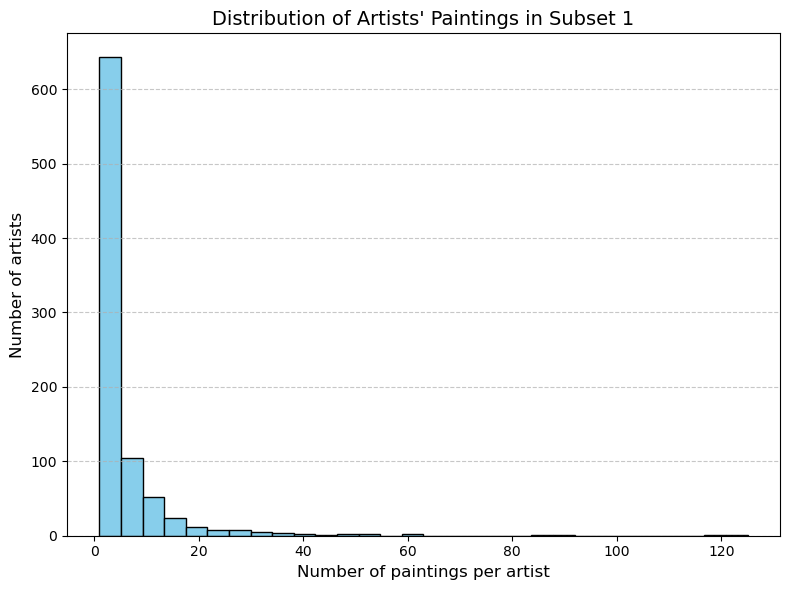

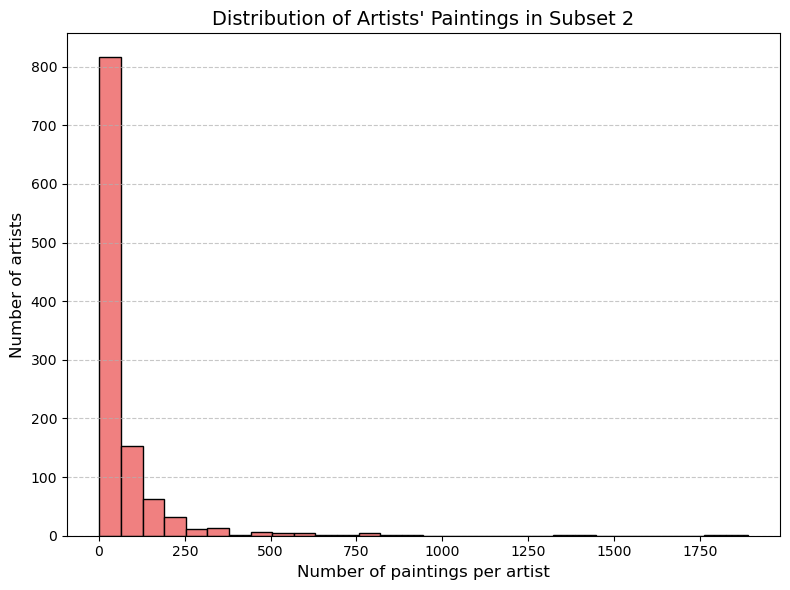

In [18]:
########## Step 2.3: Visualise the distribution of artists' artwork ##########
# View the number of artists and artworks in fuzdata1
num_artist1 = fuzdata1["artist"].nunique()
num_painting1 = fuzdata1["painting"].nunique()
artist_counts1 = fuzdata1["artist"].value_counts()
print("Number of artists in fuzdata1:", num_artist1)
print("Number of paintings in fuzdata1:", num_painting1)
print("Number of paintings per artist in fuzdata1:", artist_counts1)

# View the number of artists and artworks in fuzdata2
uni_painting2 = fuzdata2[["painting", "artist"]].drop_duplicates()
num_artist2 = uni_painting2["artist"].nunique()
num_painting2 = uni_painting2["painting"].nunique()
artist_counts2 = uni_painting2["artist"].value_counts()
print("Number of artists in fuzdata2:", num_artist2)
print("Number of paintings in fuzdata2:", num_painting2)
print("Number of paintings per artist in fuzdata2:", artist_counts2)

# Visualise the distributions
fig1, ax1 = plt.subplots(figsize = (8, 6))
ax1.hist(artist_counts1, bins = 30, edgecolor = 'black', color = 'skyblue')
ax1.set_xlabel("Number of paintings per artist", fontsize = 12)
ax1.set_ylabel("Number of artists", fontsize = 12)
ax1.set_title("Distribution of Artists' Paintings in Subset 1", fontsize = 14)
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
fig1.savefig("/Users/cyq/Desktop/Dissertation/Database/subset1_distribution.png", dpi = 300)
plt.show()

fig2, ax2 = plt.subplots(figsize = (8, 6))
ax2.hist(artist_counts2, bins = 30, edgecolor = 'black', color = 'lightcoral')
ax2.set_xlabel("Number of paintings per artist", fontsize = 12)
ax2.set_ylabel("Number of artists", fontsize = 12)
ax2.set_title("Distribution of Artists' Paintings in Subset 2", fontsize = 14)
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
fig2.savefig("/Users/cyq/Desktop/Dissertation/Database/subset2_distribution.png", dpi = 300)
plt.show()

In [10]:
########## Step 2.4: Set different thresholds to view the number of remained artists ##########
# Set threshold = 5, 10, 15, 20 to see how many artists and related paintings in fuzdata1
for threshold in [5, 10, 15, 20]:
    keep_artist1 = artist_counts1[artist_counts1 >= threshold]
    total_paintings1 = keep_artist1.sum()
    print(f"Threshold ≥ {threshold} → Number of remained artists: {len(keep_artist1)}, Total number of paintings: {total_paintings1}")

# Set threshold = 5, 10, 15, 20 to see how many artists and related paintings in fuzdata2
for threshold in [5, 10, 15, 20]:
    keep_artist2 = artist_counts2[artist_counts2 >= threshold]
    total_paintings2 = keep_artist2.sum()
    print(f"Threshold ≥ {threshold} → Number of remained artists: {len(keep_artist2)}, Total number of paintings: {total_paintings2}")

Threshold ≥ 5 → Number of remained artists: 291, Total number of paintings: 3824
Threshold ≥ 10 → Number of remained artists: 126, Total number of paintings: 2772
Threshold ≥ 15 → Number of remained artists: 66, Total number of paintings: 2065
Threshold ≥ 20 → Number of remained artists: 41, Total number of paintings: 1644
Threshold ≥ 5 → Number of remained artists: 1039, Total number of paintings: 79847
Threshold ≥ 10 → Number of remained artists: 976, Total number of paintings: 79422
Threshold ≥ 15 → Number of remained artists: 889, Total number of paintings: 78348
Threshold ≥ 20 → Number of remained artists: 726, Total number of paintings: 75637


In [73]:
########## Step 2.5: Only keep artists with over 10 artworks ##########
# Only keep artists with over 10 artworks to ensure that each artist have enough corpus for the analysis
selected_artists1 = artist_counts1[artist_counts1 >= 10].index
fuzdata1 = fuzdata1[fuzdata1['artist'].isin(selected_artists1)]
print("Number of records in fuzdata1: ", len(fuzdata1))
print("Number of unique artists in fuzdata1:", fuzdata1['artist'].nunique())

# Only keep artists with over 10 artworks to ensure that each artist have enough corpus for the analysis
selected_artists2 = artist_counts2[artist_counts2 >= 10].index
fuzdata2 = fuzdata2[fuzdata2['artist'].isin(selected_artists2)]
print("Number of records in fuzdata2: ", len(fuzdata2))
print("Number of unique artists in fuzdata2:", fuzdata2['artist'].nunique())

Number of records in fuzdata1:  2772
Number of unique artists in fuzdata1: 126
Number of records in fuzdata2:  451329
Number of unique artists in fuzdata2: 976


In [75]:
########## Step 2.6: Identifying overlapping artists and artworks between processed fuzzy description corpora ##########
# Find artists that are commonly existing in both datasets
com_artists = set(fuzdata1['artist']).intersection(set(fuzdata2['artist']))
fuzdata1_com = fuzdata1[fuzdata1['artist'].isin(com_artists)].copy()
fuzdata2_com = fuzdata2[fuzdata2['artist'].isin(com_artists)].copy()

# Find artworks that are commonly existing in both datasets
com_paintings = set(fuzdata1_com['painting']).intersection(set(fuzdata2_com['painting']))

# Keep the common artworks
fuzdata1_final = fuzdata1_com[fuzdata1_com['painting'].isin(com_paintings)]
fuzdata2_final = fuzdata2_com[fuzdata2_com['painting'].isin(com_paintings)]

# Check for the datasets
display(fuzdata1_final.head())
display(fuzdata2_final.head())

# Counting the number of works per artist in these datasets
artist_counts1 = fuzdata1_final['artist'].value_counts()
artist_counts2 = fuzdata2_final['artist'].value_counts()

# Choose artists with over 10 artworks
final_artists1 = artist_counts1[artist_counts1 >= 10].index
final_artists2 = artist_counts2[artist_counts2 >= 10].index
final_artist = final_artists1.intersection(final_artists2)

# Filter again
fuzdata1_final = fuzdata1_final[fuzdata1_final['artist'].isin(final_artist)]
fuzdata2_final = fuzdata2_final[fuzdata2_final['artist'].isin(final_artist)]

# Save the cleaned datasets
fuzdata1_final.to_csv("/Users/cyq/Desktop/Dissertation/Database/Fuzdata1.csv", index = False)
fuzdata2_final.to_csv("/Users/cyq/Desktop/Dissertation/Database/Fuzdata2.csv", index = False)

# Total number of artworks
print("Total number of artworks:", len(set(fuzdata1_final['painting']).intersection(set(fuzdata2_final['painting']))))

# Total number of artists
print("Total number of artists:", len(set(fuzdata1_final['artist']).intersection(set(fuzdata2_final['artist']))))

,art_style,painting,utterance,artist,artwork,year
0,Realism,ivan-shishkin_pine-forest-1884,A forest is growing by some water but trees ar...,ivan shishkin,pine forest,1884
1,Ukiyo_e,utagawa-kuniyoshi_oniwakamaru-preparing-to-kil...,People from a Japanese village are trying to c...,utagawa kuniyoshi,oniwakamaru preparing to kill a giant carp,None
3,Baroque,canaletto_campo-santi-apostoli,A cityscape with buildings overlooking a spars...,canaletto,campo santi apostoli,None
4,Rococo,bernardo-bellotto_mniszech-palace-in-warsaw-1779,A busy city street filled with people riding h...,bernardo bellotto,mniszech palace in warsaw,1779
5,Post_Impressionism,augustus-john_landscape-at-chirk-clwyd-1912,"Tall trees, some with colorful leaves in a for...",augustus john,landscape at chirk clwyd,1912


,art_style,painting,emotion,utterance,repetition,artist,artwork,year
31,Romanticism,viktor-vasnetsov_ivan-tsarevich-riding-the-gre...,awe,The scene is quite beautiful and reminds me of...,7,viktor vasnetsov,ivan tsarevich riding the grey wolf,1889
32,Romanticism,viktor-vasnetsov_ivan-tsarevich-riding-the-gre...,awe,There is a sense of romance between the two pe...,7,viktor vasnetsov,ivan tsarevich riding the grey wolf,1889
39,Realism,pyotr-konchalovsky_still-life-lilacs-in-the-bu...,awe,the different shades of purple used to paint t...,6,pyotr konchalovsky,still life lilacs in the bucket,1943
129,Post_Impressionism,theo-van-rysselberghe_renee-druet-with-violin-...,contentment,The woman looks like she's a very skilled viol...,6,theo van rysselberghe,renee druet with violin,1910
143,Impressionism,edgar-degas_two-horses-in-a-pasture,contentment,the light reflects beautifully on the brown sk...,7,edgar degas,two horses in a pasture,None


Total number of artworks: 2771
Total number of artists: 126


In [77]:
########## Step 2.7: Combine two fuzzy description dataset ##########
# Create OLA subset
ola = fuzdata1_final[['painting', 'artist', 'artwork', 'year', 'art_style', 'utterance']].copy()
ola['source'] = 'OLA'

# Check if there are duplicate paintings in the ola
duplicate_ola = ola["painting"].value_counts()
duplicate_ola = duplicate_ola[duplicate_ola > 1]
print("Duplicated number of OLA paintings:", len(duplicate_ola))
display(duplicate_ola)

# Combine identical painting utterances and art styles
ola = (
    ola.groupby("painting")
    .agg({
        "artist": "first", 
        "artwork": "first",
        "year": "first",
        "art_style": lambda x: "; ".join(sorted(set(x))), 
        "utterance": lambda x: " ".join(x),
        "source": "first",
    })
    .reset_index()
)

# Print outcome
print("Number of unique paintings in ola:", len(ola))

# Create ARTEMIS subset
artemis = fuzdata2_final[['painting', 'artist', 'artwork', 'year', 'art_style', 'utterance', 'emotion', 'repetition']].copy()
artemis['source'] = 'ARTEMIS'

# Combine these two subsets into one dataset
final_corpus = pd.concat([ola, artemis], ignore_index = True)

# Sort by painting
final_corpus = final_corpus.sort_values(by = ['painting', 'source']).reset_index(drop = True)

# Save the final fuzzy description corpus
final_corpus.to_csv("/Users/cyq/Desktop/Dissertation/Database/FinalCorpus.csv", index = False)

# View the data structure
display(final_corpus.head())
print("Duplicated rows of final_corpus: ", final_corpus.duplicated().sum())
print("Missing values of final_corpus: \n", final_corpus.isnull().sum())

# Total number of artworks
print("Total number of artworks:", len(set(final_corpus['painting'])))

# Total number of artists
print("Total number of artists:", len(set(final_corpus['artist'])))

Duplicated number of OLA paintings: 1


painting
james-mcneill-whistler_arrangement-in-black-no-3-sir-henry-irving-as-philip-ii-of-spain    2
Name: count, dtype: int64

Number of unique paintings in ola: 2771


,painting,artist,artwork,year,art_style,utterance,source,emotion,repetition
0,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,the two lovers being pulled apart,ARTEMIS,awe,5.0
1,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,Two people carrying two people and i am not su...,ARTEMIS,fear,5.0
2,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,The two standing figures look to be in the mid...,ARTEMIS,excitement,5.0
3,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,Looks like women being taken away to who knows...,ARTEMIS,fear,5.0
4,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,It is amusing that someone wanted to paint thi...,ARTEMIS,amusement,5.0


Duplicated rows of final_corpus:  0
Missing values of final_corpus: 
 painting         0
artist           0
artwork          0
year          8585
art_style        0
utterance        0
source           0
emotion       2771
repetition    2771
dtype: int64
Total number of artworks: 2771
Total number of artists: 126


In [14]:
########## Step 2.8: Use "painting" to construct wikiart urls ##########
# Define a function to slugify painting
def slugify(painting):
    return painting.strip().lower().replace("_", "/")

# Define a function to remove the number in () at the end of the painting
def remove_end(painting):
    return re.sub(r'\(\d+\)$', '', painting.strip().lower())

# Define a function to construct wikiart url by using paintings
def wikiart_url(slugified_painting):
    url = f"https://www.wikiart.org/en/{slugified_painting}"
    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        response = requests.get(url, headers = headers, timeout = 10) # Send get request to the constructed url with a timeout of 10s
        # If the status code is not 200, return None
        if response.status_code != 200:
            return None, None
        # Use BeautifulSoup to parse the HTML content of the page
        soup = BeautifulSoup(response.content, "html.parser")
        # Find <img> tag and extract the image url
        image_tag = soup.find("img", {"itemprop": "image"})
        image_url = image_tag['src'] if image_tag and image_tag.has_attr('src') else None
        # Find <meta> tag and extract the image descriptions
        text_tag = soup.find("meta", {"name": "description"})
        text = text_tag["content"] if text_tag and text_tag.has_attr('content') else None
        return image_url, text
    except Exception as e:
        return None, None

# Define a function to crawl wikiart pages
def crawl(final_corpus, painting_column = "painting", output_path = "wikiart.csv"):
    # Extract unique paintings from the dataset
    unique_paintings = final_corpus[painting_column].dropna().unique()
    print(f"Starting to crawl...")
    # Create empty lists to store successful results and failures
    results = []
    fails = []
    # Loop through paintings
    for painting in tqdm(unique_paintings, desc = "Progress:"):
        cleaned = remove_end(painting)
        slugified = slugify(cleaned)
        img_url, text = wikiart_url(slugified)
        # If urls can find corresponding page, store the results
        if img_url:
            results.append({
                "painting": painting,
                "image_url": img_url,
                "image_description": text
            })
        # If urls can not find corresponding page, record the failed painting name
        else:
            fails.append(painting)
        # Obey the web scraping etiquette
        time.sleep(1)
    # Convert results to a DataFrame and save it into a new csv
    results_data = pd.DataFrame(results)
    results_data.to_csv(output_path, index = False)
    # Print the crawling results
    success = len(results_data)
    total = len(unique_paintings)
    print(f"Crawl completed, success rate: {success}/{total} ({success/total: .1%})")
    # If there are failures, print and save them to a new dataset
    if fails:
        print(f"Number of failed paintings: {len(fails)}")
        for p in fails:
            print("-", p)
        pd.DataFrame({"Failed painting": fails}).to_csv("/Users/cyq/Desktop/Dissertation/Database/Wikiart_Fail_paintings.csv", index = False)
    return results_data, fails

# Conducting crawling
crawl_results, failures = crawl(final_corpus, painting_column = "painting", output_path = "/Users/cyq/Desktop/Dissertation/Database/wikiart.csv")

python(6320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Starting to crawl...


Progress:: 100%|██████████████████████████| 2771/2771 [2:58:13<00:00,  3.86s/it]

Crawl completed, success rate: 2686/2771 ( 96.9%)
Number of failed paintings: 85
- aubrey-beardsley_not_detected_245615
- camille-corot_peasants-from-mur
- camille-pissarro_picking-peas
- claude-monet_monet-s-garden-in-argenteuil-sun
- david-burliuk_bouquet-of-wild-flowers-with-ocean-background
- david-burliuk_gypsies-with-horse
- david-burliuk_hot-spring-in-new-mexico(1)
- david-burliuk_in-a-park
- david-burliuk_in-a-russian-village-1926
- david-burliuk_russian-man-on-sled-pulled-by-horse
- david-burliuk_seascape-in-moonlight
- david-burliuk_still-life-with-a-jug
- david-burliuk_still-life-with-roses-and-fruits-1933
- david-burliuk_the-drunkards-fly-away
- david-burliuk_the-gardener-1948
- david-burliuk_two-sisters
- edouard-manet_sketch-of-moving-farmer
- eugene-delacroix_the-death-of-sardanapalus-1827(1)
- filippo-lippi_madonna-and-child-3
- gustave-dore_the-death-of-gideon-s-sons
- joaquã­n-sorolla_artist-s-patio-cafe-novedades-seville-1915
- joaquã­n-sorolla_child-s-siesta
- joaqu

In [79]:
########## Step 2.9: Combine the FinalCorpus with wikiart dataset ##########
# Load the dataset
wikiart_final = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/wikiart.csv")

# Use ‘painting’ to match and combine FinalCorpus with wikiart image dataset
finetune = final_corpus.merge(wikiart_final, on = "painting", how = "inner")

# Only keep relevant columns
finetune = finetune.dropna(subset = ["image_url", "utterance"]).reset_index(drop = True)

# Save the final fine-tune dataset
finetune.to_csv("/Users/cyq/Desktop/Dissertation/Database/Fine_tune.csv")

# View the data structure of final fine-tune dataset
print("Structure of final fine-tune dataset: \n")
display(finetune.head()) # First 5 lines
print("Duplicated rows of finetune:", finetune.duplicated().sum()) # Show the number of duplicated rows
print("Missing values of finetune: \n", finetune.isnull().sum()) # Show the number of missing data

Structure of final fine-tune dataset: 



,painting,artist,artwork,year,art_style,utterance,source,emotion,repetition,image_url,image_description
0,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,the two lovers being pulled apart,ARTEMIS,awe,5.0,https://uploads0.wikiart.org/images/albrecht-d...,‘Abduction Of A Woman (Rape Of The Sabine Wome...
1,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,Two people carrying two people and i am not su...,ARTEMIS,fear,5.0,https://uploads0.wikiart.org/images/albrecht-d...,‘Abduction Of A Woman (Rape Of The Sabine Wome...
2,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,The two standing figures look to be in the mid...,ARTEMIS,excitement,5.0,https://uploads0.wikiart.org/images/albrecht-d...,‘Abduction Of A Woman (Rape Of The Sabine Wome...
3,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,Looks like women being taken away to who knows...,ARTEMIS,fear,5.0,https://uploads0.wikiart.org/images/albrecht-d...,‘Abduction Of A Woman (Rape Of The Sabine Wome...
4,albrecht-durer_abduction-of-a-woman-rape-of-th...,albrecht durer,abduction of a woman rape of the sabine women,1495,Northern_Renaissance,It is amusing that someone wanted to paint thi...,ARTEMIS,amusement,5.0,https://uploads0.wikiart.org/images/albrecht-d...,‘Abduction Of A Woman (Rape Of The Sabine Wome...


Duplicated rows of finetune: 0
Missing values of finetune: 
 painting                0
artist                  0
artwork                 0
year                 8211
art_style               0
utterance               0
source                  0
emotion              2686
repetition           2686
image_url               0
image_description       0
dtype: int64


In [81]:
########## Step 2.10: Download the wikiart images ##########
# Load the dataset
finetune = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/Fine_tune.csv")

# Set the saving path
image_folder = "/Users/cyq/Desktop/Dissertation/Database/wikiart_images"
os.makedirs(image_folder, exist_ok = True)

# Use unique urls to download the images
unique_urls = finetune.drop_duplicates(subset = ["painting"])[["painting", "image_url"]].reset_index(drop = True)

# Prepare to download images
print("Downloading ...:")

# Create a new empty list to store successes and failures
downloaded_images = []
failed_image = []

# Loop through urls to download images
for _, row in tqdm(unique_urls.iterrows(), total = len(unique_urls)):
    painting = row["painting"]
    url = row["image_url"]
    # Extract filenames from urls
    filenames = f"{painting}__{url.split('/')[-1].split('?')[0]}"
    image_path = os.path.join(image_folder, filenames)
    # If the image_path do not exist, download the urls
    if not os.path.exists(image_path):
        try:
            response = requests.get(url, timeout = 10)
            if response.status_code == 200:
                with open(image_path, "wb") as f:
                    f.write(response.content)
        except Exception as e:
            print(f"Download fails: {url}({e})")
            failed_image.append({
                "painting": painting,
                "url": url,
                "error": str(e)
            })
            continue
    # Record successful downloads
    downloaded_images.append({
        "painting": painting,
        "url": url,
        "image_path": image_path
    })

# Save failed downloaded urls
if failed_image:
    pd.DataFrame(failed_image).to_csv("/Users/cyq/Desktop/Dissertation/Database/Download_failed_images.csv", index = False)

# Convert the successes to DataFrame
downloaded_images = pd.DataFrame(downloaded_images)

# Only keep rows where painting images downloaded successfully
lora_ft = pd.merge(finetune,
                   downloaded_images,
                   left_on = ["painting", "image_url"],
                   right_on = ["painting", "url"],
                   how = "inner")

# Rename columns
lora_ft = lora_ft.rename(
    columns = {
        "painting": "PAINTING_ID",
        "artist": "AUTHOR",
        "artwork": "TITLE",
        "year": "YEAR",
        "art_style": "STYLE",
        "utterance": "UTTERANCE",
        "emotion": "EMOTION",
        "repetition": "REPETITION",
        "image_url": "URL",
        "image_path": "PATH"
    }
)

# Only keep necessary columns
keep_c = ["PATH", "PAINTING_ID", "AUTHOR", "TITLE", "YEAR", "STYLE", "UTTERANCE", "EMOTION", "REPETITION", "URL"]
lora_ft = lora_ft[keep_c]

# Save and print results
lora_ft.to_csv("/Users/cyq/Desktop/Dissertation/Database/LoRA_finetune.csv", index = False)
print(f"Successfully downloaded images: {len(downloaded_images)}")
print(f"Final fine-tune dataset rows: {len(lora_ft)}")
print(f"Number of failed downloads: {len(failed_image)}")

100%|████████████████████████████████████| 2686/2686 [00:00<00:00, 31203.94it/s]


Successfully downloaded images: 2686
Final fine-tune dataset rows: 17135
Number of failed downloads: 0


In [83]:
########## Step 2.11: Find out which paintings correspond to multiple "author+title" ##########
# Get unique image URLs from original finetune and from successfully downloaded set
original_paintings = set(finetune["image_url"].unique())
final_paintings = set(lora_ft["URL"].unique())

# Find URLs present in original but missing after download
missing_paintings = original_paintings - final_paintings
print(f"Number of missing paintings: {len(missing_paintings)}")

# Output the missing records
missing_rows = finetune[finetune["image_url"].isin(missing_paintings)]
display(missing_rows[["painting", "image_url"]].drop_duplicates())

Number of missing paintings: 0


,painting,image_url


In [85]:
########## Step 2.12: Find Out the Visually Similar Images ##########
# Load the dataset and image folder
lora_ft = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/LoRA_finetune.csv")
image_folder = "/Users/cyq/Desktop/Dissertation/Database/wikiart_images"
paths = lora_ft["PATH"].dropna().unique()

# Define a function to compute MD5 hash for each image path
def md5(filepath):
    try:
        with open(filepath, "rb") as file:
            return hashlib.md5(file.read()).hexdigest()
    except:
        return None

# Define a function to compute phash for each image path
def phash(filepath):
    try:
        img_phash = Image.open(filepath).convert("RGB")
        return imagehash.phash(img_phash)
    except:
        return None

# Define a function to compare resolution for each image path
def resolution(filepath):
    try:
        img_res = Image.open(filepath)
        return img_res.size[0] * img_res.size[1]
    except:
        return 0

# Loop through to check if there are totally duplicated images with MD5
md5_dict = {} # Create a new empty distionary
for path in tqdm(paths, desc = "Computing MD5:"):
    h = md5(path)
    if h is None:
        continue
    if h not in md5_dict:
        md5_dict[h] = []
    md5_dict[h].append(path)

# Extract all the duplicated images
md5_dup = [p for group in md5_dict.values() if len(group) > 1 for p in group]

# Save all the duplicated records into a new csv
md5_rec = []
for h, group in md5_dict.items():
    if len(group) > 1:
        for p in group:
            md5_rec.append({"path": p, "md5_hash": h})
pd.DataFrame(md5_rec).to_csv("/Users/cyq/Desktop/Dissertation/Database/md5_duplicates.csv", index = False)

# Loop through to compute pHash difference
phash_dict = {} # Create a new empty distionary
for path in tqdm(paths, desc = "Computing pHash:"):
    h = phash(path)
    if h is not None:
        phash_dict[path] = h

# Convert phash dictionary into list
phash_data = list(phash_dict.items())

# Create a new empty set to record paths that need to be removed
phash_remove = set()

# Create a new empty list to record all the similar images and corresponding pHash difference
phash_rec = []

# Loop through all image pairs to calculate pHash differences
for i in range(len(phash_data)):
    path1, hash1 = phash_data[i]
    for j in range(i + 1, len(phash_data)):
        path2, hash2 = phash_data[j]
        diff = hash1 - hash2
        # Set threshold to be 5, consider to be visually similar if the difference below 5
        if diff < 5:
            res1 = resolution(path1)
            res2 = resolution(path2)
            # Keep image with higher resolution while removing the lower one
            if res1 >= res2:
                phash_remove.add(path2)
            else:
                phash_remove.add(path1)
            # Record the matched pairs and the related hash difference
            phash_rec.append({
                "path_1": path1,
                "path_2": path2,
                "phash_diff": diff
            })

# Save all the similar records into a new csv
pd.DataFrame(phash_rec).to_csv("/Users/cyq/Desktop/Dissertation/Database/phash_similar.csv", index = False)

# Combine all duplicate image paths found by MD5 and pHash
need_remove = set(md5_dup) | phash_remove

# Remove all the records in the 'need_remove' from finetune
LoRA_final = lora_ft[~ lora_ft["PATH"].isin(need_remove)].copy()

# Save the final LoRA dataset for fine-tuning stage
LoRA_final.to_csv("/Users/cyq/Desktop/Dissertation/Database/LoRA_final.csv", index = False)

# Print number of removed artworks
print(f"\nTotal number of removed images: {len(need_remove)}")

# Print number of artworks in the final LoRA dataset
print(f"\nTotal number of the final LoRA dataset: {LoRA_final["URL"].nunique()}")

Computing pHash:: 100%|████████████████████| 2686/2686 [00:13<00:00, 198.54it/s]



Total number of removed images: 20

Total number of the final LoRA dataset: 2666


In [86]:
########## Step 2.13: Filter again to keep artists with over 10 artworks ##########
# Count the number of works per artist in the dataset
lora_artist_counts = LoRA_final['AUTHOR'].value_counts()

# Choose artists with over 10 artworks
lora_artists_10 = lora_artist_counts[lora_artist_counts > 10].index

# Filter again
Final_LoRA = LoRA_final[LoRA_final['AUTHOR'].isin(lora_artists_10)].copy()

# Save the datasets
Final_LoRA.to_csv("/Users/cyq/Desktop/Dissertation/Database/Final_LoRA_Dataset.csv", index = False)

# Print outcomes
print(f"Number of artists with over 10 artworks: {len(lora_artists_10)}")
print(f"Number of artworks in Final_LoRA_Dataset: {Final_LoRA['PAINTING_ID'].nunique()}")
print(f"Number of utterances: {len(Final_LoRA)}")

Number of artists with over 10 artworks: 122
Number of artworks in Final_LoRA_Dataset: 2666
Number of utterances: 16999


In [89]:
########## Step 2.14: Check if there are common artworks between these two datasets ##########
# Load the datasets
Final_LoRA = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/Final_LoRA_Dataset.csv")
semart = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemiCorpus_deduplicated.csv")

# Add new standadised columns in the Final_LoRA_Dataset
Final_LoRA["norm_title"] = Final_LoRA["TITLE"].apply(normalize)
Final_LoRA["norm_author"] = Final_LoRA["AUTHOR"].apply(normalize_author)

# Use the "norm_author" and "norm_title" to match common artworks between Final_LoRA and semart
match = pd.merge(
    Final_LoRA, semart,
    on = ["norm_author", "norm_title"],
    how = "inner",
    suffixes = ("_lora", "_semart")
)

# Print number of successfully matched artworks and save the records into a new dataset
print(f"Number of successfully matched artworks: {match[['norm_author', 'norm_title']].drop_duplicates().shape[0]}")
match.to_csv("/Users/cyq/Desktop/Dissertation/Database/lora_semart_matched.csv", index = False)

Number of successfully matched artworks: 64


In [91]:
########## Step 2.15: Compute the cosine similarity between those matched descriptions ##########
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Use "norm_author" and "norm_title" to construct key that needed to be deleted
matched_keys = match[["norm_author", "norm_title"]].drop_duplicates()

# Create an empty list to store the results
sim_results = []

# Compare each matched artworks one by one
for _, row in matched_keys.iterrows():
    author = row["norm_author"]
    title = row["norm_title"]
    # Extract all the utterances for the artwork from the processed ArtEmis
    lora_texts = match[
        (match["norm_author"] == author) & 
        (match["norm_title"] == title)
    ]["UTTERANCE"].dropna().tolist()
    # Extract the description for the artwork from the processed SemArt
    semart_texts = match[
        (match["norm_author"] == author) & 
        (match["norm_title"] == title)
    ]["DESCRIPTION"].dropna().unique().tolist()
    # Skip if either side is empty
    if len(semart_texts) == 0 or len(lora_texts) == 0:
        continue
    # Extract the first description as reference text
    semart_text = semart_texts[0]
    # Construct comparison pairs between utterances and description for each artwork
    comparison_pairs = [semart_text] + lora_texts
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(comparison_pairs)
    similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()
    # Add summary stats
    sim_results.append({
        "norm_author": author,
        "norm_title": title,
        "semart_text": semart_text,
        "utterance_count": len(lora_texts),
        "sim_max": similarities.max(),
        "sim_min": similarities.min(),
        "sim_mean": similarities.mean()
    })

# Save the outcomes
similarity_df = pd.DataFrame(sim_results)
similarity_df.to_csv("/Users/cyq/Desktop/Dissertation/Database/lora_semart_text_similarity.csv", index = False)
display(similarity_df.sort_values("sim_mean", ascending = False))

,norm_author,norm_title,semart_text,utterance_count,sim_max,sim_min,sim_mean
15,fra angelico,boscoaifratialtarpiece,This altarpiece was painted by Angelico after ...,6,0.368547,0.149015,0.285101
11,domenico ghirlandaio,marriageofmary,"On the second level, the Presentation of the V...",6,0.445163,0.030721,0.275076
14,edouard manet,boating,This picture was painted during the summer of ...,7,0.393613,0.044512,0.254601
43,paul gauguin,thewhitehorse,"This canvas, typical of Gauguin's late style, ...",6,0.369949,0.176324,0.239216
16,fra angelico,cortonapolyptych,"This polyptych, as shown by the recent restora...",7,0.355647,0.093543,0.237704
...,...,...,...,...,...,...,...
24,fra angelico,stromuald,This panel probably was part of the San Marco ...,6,0.124580,0.033254,0.059305
28,frans hals,singingboywithaflute,This Caravaggesque painting recalls similar bu...,6,0.136126,0.000000,0.055792
59,vincent van gogh,selfportraitwithstrawhat,"Catalogue numbers: F 526, JH 0309",6,0.000000,0.000000,0.000000
61,vincent van gogh,thegardenofsaintpaulhospital,"Catalogue numbers: F 660, JH 1849",6,0.000000,0.000000,0.000000


Top-10 Similarity Artworks: 


,norm_author,norm_title,semart_text,utterance_count,sim_max,sim_min,sim_mean
15,fra angelico,boscoaifratialtarpiece,This altarpiece was painted by Angelico after ...,6,0.368547,0.149015,0.285101
11,domenico ghirlandaio,marriageofmary,"On the second level, the Presentation of the V...",6,0.445163,0.030721,0.275076
14,edouard manet,boating,This picture was painted during the summer of ...,7,0.393613,0.044512,0.254601
43,paul gauguin,thewhitehorse,"This canvas, typical of Gauguin's late style, ...",6,0.369949,0.176324,0.239216
16,fra angelico,cortonapolyptych,"This polyptych, as shown by the recent restora...",7,0.355647,0.093543,0.237704
51,tintoretto,mosesreceivingthetablesofthelaw,"While Moses, transfigured by divine light, rec...",6,0.373112,0.070294,0.237401
2,bernardo bellotto,dresdenthefrauenkircheandtherampischegasse,Bellotto was not the first painter at the Saxo...,6,0.508559,0.074918,0.235633
55,tintoretto,stmaryofegypt,In the Sala Inferiore there are two paintings ...,6,0.380923,0.080675,0.233552
41,leonardo da vinci,virginoftherocks,There are two versions of the Virgin of the Ro...,6,0.357563,0.084396,0.224874
5,bernardo bellotto,viewofveronaandtheriveradigefromthepontenuovo,The campanile of S. Anastasia and the ancient ...,6,0.305893,0.000000,0.221845


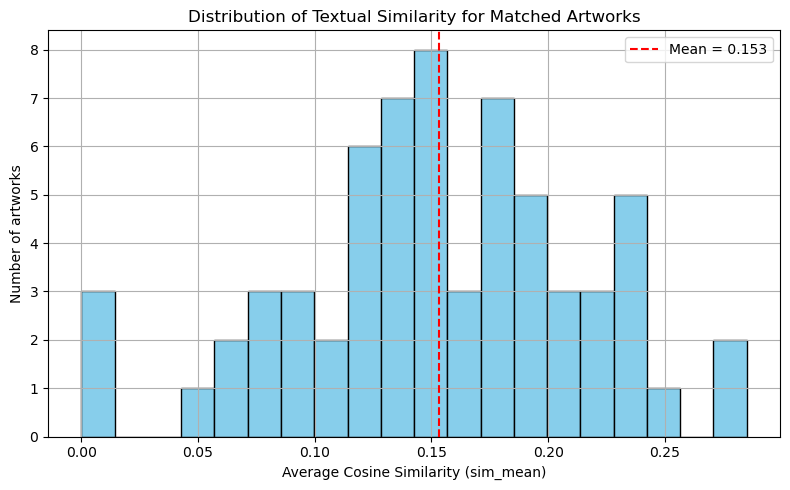


Artworks that are ready to be deleted（mean similarity > 0.35）：0


,norm_author,norm_title,semart_text,utterance_count,sim_max,sim_min,sim_mean


In [95]:
########## Step 2.16: Visualise the similarity ##########
import pandas as pd
import matplotlib.pyplot as plt

# Load the similarity results
similarity_df = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/lora_semart_text_similarity.csv")

# Use the mean similarity to rank the top 10 artworks
top10 = similarity_df.sort_values("sim_mean", ascending = False).head(10)
print("Top-10 Similarity Artworks: ")
display(top10)

# Plot the distribution of textual similarity for matched artworks
plt.figure(figsize = (8, 5))
plt.hist(similarity_df["sim_mean"], bins = 20, color = "skyblue", edgecolor = "black")
plt.axvline(similarity_df["sim_mean"].mean(), color = 'red', linestyle = '--', label = f"Mean = {similarity_df['sim_mean'].mean():.3f}")
plt.xlabel("Average Cosine Similarity (sim_mean)")
plt.ylabel("Number of artworks")
plt.title("Distribution of Textual Similarity for Matched Artworks")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output the artwork that mean similarity higher than 0.35
high_sim_threshold = 0.35
high_sim_df = similarity_df[similarity_df["sim_mean"] > high_sim_threshold].sort_values("sim_mean", ascending = False)
print(f"\nArtworks that are ready to be deleted（mean similarity > {high_sim_threshold}: {len(high_sim_df)}")
display(high_sim_df)

# Save the high similarity candidates
high_sim_df.to_csv("/Users/cyq/Desktop/Dissertation/Database/lora_semart_high_similarity_candidates.csv", index = False)

In [3]:
# -------------------- Part 3: Data Splitting --------------------
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [99]:
########## Step 3.1: Divide training set and test set ##########
# Load the datasets
Semi_data = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemiCorpus_deduplicated.csv")
Sub_data = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SubCorpus_training_set.csv")

# Get the unique painting ids
lora_painting = Sub_data["PAINTING_ID"].drop_duplicates()

# Use seed to randomly split dataset, 80% as train set, 20% as test set
train_paintings, test_paintings = train_test_split(lora_painting, test_size = 0.2, random_state = 42)
training_set = Final_LoRA[Final_LoRA["PAINTING_ID"].isin(train_paintings)].copy()
test_set = Final_LoRA[Final_LoRA["PAINTING_ID"].isin(test_paintings)].copy()

# Save training set and test set into new csvs
training_set.to_csv("/Users/cyq/Desktop/Dissertation/Database/SubCorpus_training_set.csv", index = False)
test_set.to_csv("/Users/cyq/Desktop/Dissertation/Database/test_set.csv", index = False)

# Print outcomes
print(f"Number of artworks in training set: {training_set['PAINTING_ID'].nunique()}")
print(f"Number of artworks in test set: {test_set['PAINTING_ID'].nunique()}")

Number of artworks in lora training set: 2132
Number of artworks in test set: 534


In [8]:
########## Step 3.2: Divide training set and validation set ##########
# Load the datasets
Semi_data = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SemiCorpus_deduplicated.csv")
Sub_data = pd.read_csv("/Users/cyq/Desktop/Dissertation/Database/SubCorpus_training_set.csv")

# Obtain unique painting list in the Sub_data
Sub_uni = Sub_data["PAINTING_ID"].unique()

# Divide SemiCorpus into 80% training set, 20% validation set
Semi_train, Semi_val = train_test_split(Semi_data, test_size = 0.2, random_state = 985)

# Divide SubCorpus into 80% training set, 10% validation set, 10% test set
Sub_train_painting, Sub_other_painting = train_test_split(Sub_uni, test_size = 0.2, random_state = 985)
Sub_val_painting, Sub_test_painting = train_test_split(Sub_other_painting, test_size = 0.5, random_state = 985)

# Extract corresponding utterance by the PAINTING_ID
Sub_train = Sub_data[Sub_data["PAINTING_ID"].isin(Sub_train_painting)].reset_index(drop = True)
Sub_val = Sub_data[Sub_data["PAINTING_ID"].isin(Sub_val_painting)].reset_index(drop = True)
Sub_test = Sub_data[Sub_data["PAINTING_ID"].isin(Sub_test_painting)].reset_index(drop = True)


# Save the spliting outputs
Semi_train.to_csv("/Users/cyq/Desktop/Dissertation/Database/SemiCorpus_to_train.csv", index = False)
Semi_val.to_csv("/Users/cyq/Desktop/Dissertation/Database/SemiCorpus_to_validation.csv", index = False)
Sub_train.to_csv("/Users/cyq/Desktop/Dissertation/Database/SubCorpus_to_train.csv", index = False)
Sub_val.to_csv("/Users/cyq/Desktop/Dissertation/Database/SubCorpus_to_validation.csv", index = False)
Sub_test.to_csv("/Users/cyq/Desktop/Dissertation/Database/test_set.csv", index = False)

# Print outcomes
print(f"Semi-structural dataset: training set: {len(Semi_train)} paintings, validation set: {len(Semi_val)} paintings")
print(f"Subjective dataset: training set: {len(Sub_train)} utterances from {len(Sub_train_painting)} paintings, validation set: {len(Sub_val)} utterances from {len(Sub_val_painting)} paintings")
print(f"Test set: {len(Sub_test)} utterances from {len(Sub_test_painting)} paintings")

Semi-structural dataset: training set: 15647 paintings, validation set: 3912 paintings
Subjective dataset: training set: 10885 utterances from 1705 paintings, validation set: 1332 utterances from 213 paintings
Test set: 1360 utterances from 214 paintings
